# Distribuciones empíricas

In [3]:
from  datascience import *
import numpy as np
import matplotlib.pylab as plots
plots.style.use('fivethirtyeight')
%matplotlib inline

## Un dado

In [4]:
caras_dado = make_array(1, 2, 3, 4, 5, 6, )

In [5]:
caras = Table().with_column('caras_dado',caras_dado)

Text(0.5, 1.0, 'Histograma discreto')

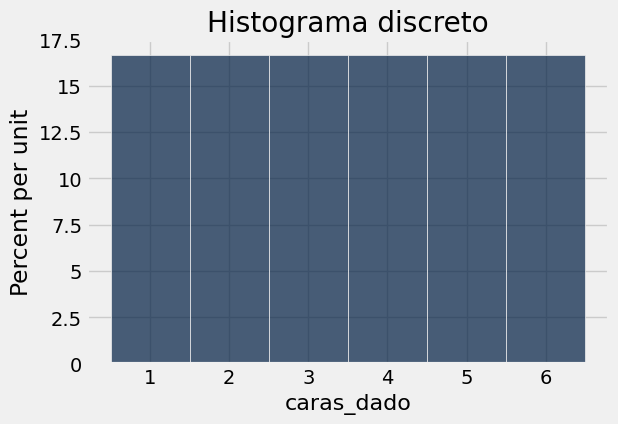

In [6]:
caras_bins = np.arange(0.5, 6.6, 1)
caras.hist(bins = caras_bins)
plots.title("Histograma discreto")

¿Por qué toma el valor de 16.67% el valor maximo de  cada caja?

In [7]:
def distribucion_dado(N):
    caras.sample(N).hist(bins=caras_bins)
    plots.xlim(1, 6)
    

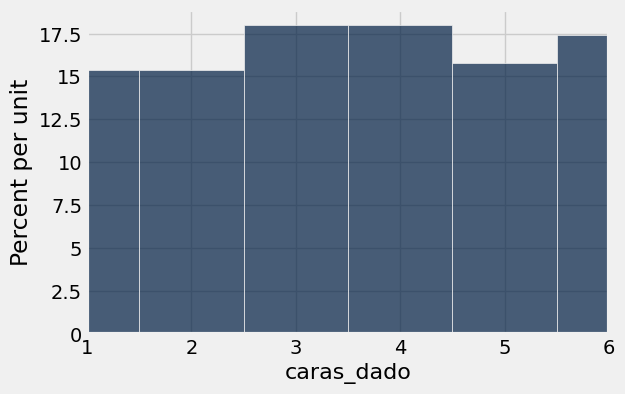

In [8]:
N = 1000
distribucion_dado(N)

# Ley de los promedios

Si un experimento casual se repite de forma independiente y en condiciones idénticas, entonces, a largo plazo, la proporción de veces que ocurre un evento se acerca cada vez más a la probabilidad teórica del evento. Por ejemplo, a largo plazo, la proporción de veces que aparece la cara con cuatro puntos se acerca cada vez más a 1/6.

## Distribución empírica

In [9]:
united = Table().read_table("united.csv")

(0.0, 200.0)

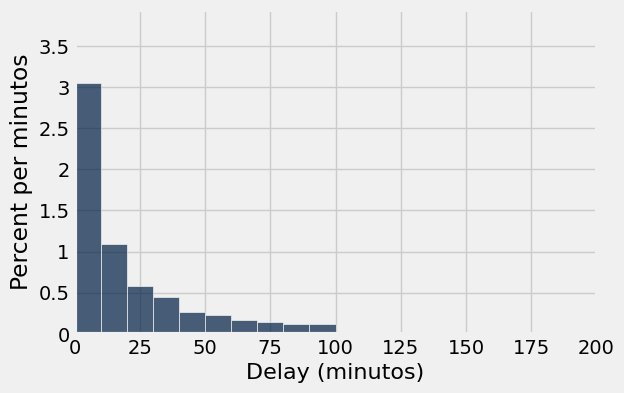

In [10]:
delay=np.arange(-20, 101, 10)
united.select("Delay").hist(bins=delay, unit="minutos")
plots.xlim(0, 200)

## Distribución  aleatoria

In [11]:
muestra = united.select("Delay").sample(1000)

(0.0, 200.0)

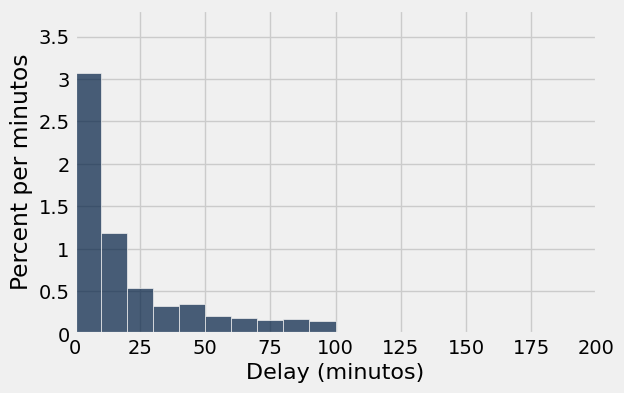

In [12]:
muestra.select("Delay").hist(bins=delay, unit="minutos")
plots.xlim(0, 200)

# Distribución de grandes muestras:

(0.0, 200.0)

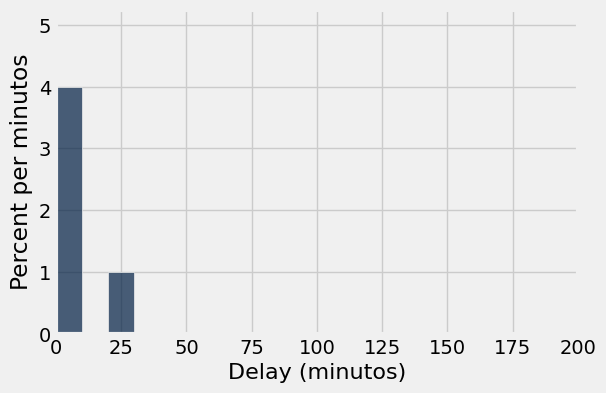

In [13]:
muestra1 = united.select("Delay").sample(10)
muestra1.select("Delay").hist(bins=delay, unit="minutos")
plots.xlim(0, 200)

(0.0, 200.0)

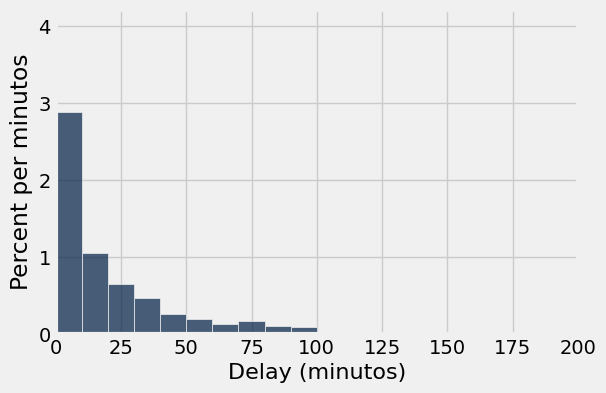

In [14]:

muestra2 = united.select("Delay").sample(1000)
muestra2.select("Delay").hist(bins=delay, unit="minutos")
plots.xlim(0, 200)

# Parámetros y Estadístico

Los datos de población son un todo y completo. La muestra es un subconjunto de la población que se obtiene utilizando el muestreo

Mientras que un parámetro es una función de los datos de la población, el estadístico lo es de los datos de una muestra.



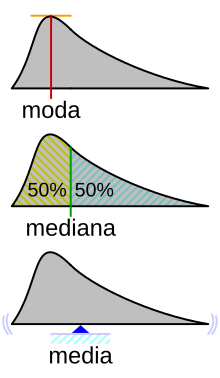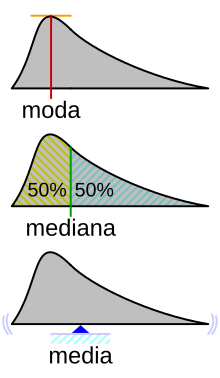

**Promedio :**     Es la media aritmética y se calcula sumando un grupo de números y dividiendo a continuación por el recuento de dichos números. Por ejemplo, el promedio de 2, 3, 3, 5, 7 y 10 es 30 dividido por 6, que es 5.

**Mediana :**    Es el número intermedio de un grupo de números; es decir, la mitad de los números son superiores a la mediana y la mitad de los números tienen valores menores que la mediana. Por ejemplo, la mediana de 2, 3, 3, 5, 7 y 10 es 4.

**Moda:**     Es el número que aparece más frecuentemente en un grupo de números. Por ejemplo, la moda de 2, 3, 3, 5, 7 y 10 es 3.

In [15]:
np.median(united.column('Delay'))

2.0

In [16]:
united.where('Delay', are.below_or_equal_to(2)).num_rows / united.num_rows

0.5018444846292948

La mitad de todos los vuelos partieron no más de 2 minutos después de su hora de salida programada. ¡Es un retraso muy corto!

In [17]:
united.where('Delay', are.equal_to(2)).num_rows

480

# Estadístico

Es cualquier número calculado a partir de los datos de una muestra. Por lo tanto, la mediana de la muestra es un estadístico.


In [18]:
muestra = united.select("Delay").sample(1000)
np.median(muestra.column("Delay"))

2.0

In [19]:
np.mean(muestra.column("Delay"))

16.109000000000002

## Simulando un estadístico


1. Elegir un tamaño de la muestra.
2. Calcular el valor del estadístico con la muestra escogida.

In [20]:
def random_sample_median(size):
    return np.median(united.sample(size).column('Delay'))

In [21]:
random_sample_median(100)

4.0

In [22]:
sample_medians = make_array()

for i in np.arange(1000):
    new_median = random_sample_median(10)
    sample_medians = np.append(sample_medians, new_median)

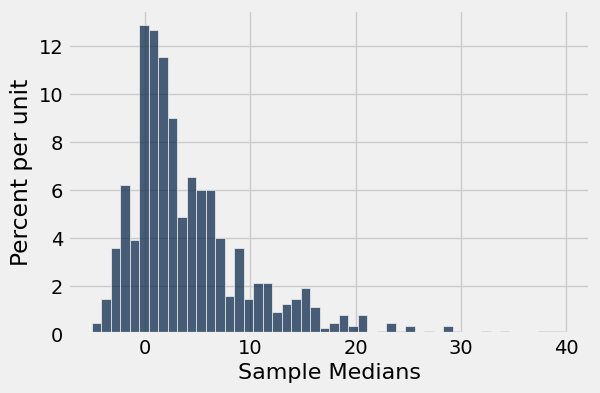

In [23]:
medians = Table().with_columns(
    "Sample Medians", sample_medians,
    "Sample Size", 10)
medians.hist("Sample Medians", bins = 50)

In [24]:
np.mean(medians.column("Sample Medians"))

4.2454999999999998

In [229]:
sample_medians2 = make_array()

for i in np.arange(1000):
    new_median = random_sample_median(1000)
    sample_medians2 = np.append(sample_medians2, new_median)

(0.0, 20.0)

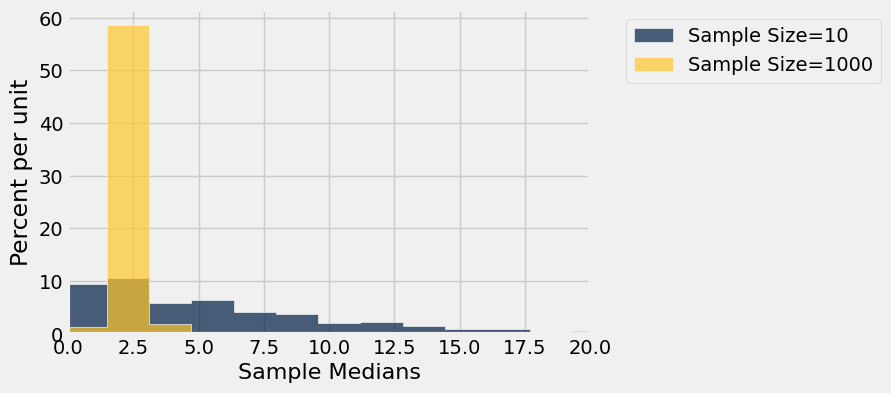

In [231]:
medians.append(Table().with_columns(
    "Sample Medians", sample_medians2,
    "Sample Size", 1000)).hist("Sample Medians", group="Sample Size", bins=50)
plots.xlim(0, 20)

simular procesos aleatorios repetidamente es una forma de aproximar las distribuciones de probabilidad sin averiguar las probabilidades matemáticamente o generar todas las posibles muestras aleatorias. Por lo tanto, las simulaciones informáticas se convierten en una poderosa herramienta en la ciencia de datos. Pueden ayudar a los científicos de datos a comprender las propiedades de cantidades aleatorias que serían complicadas de analizar de otras maneras.